In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def reader(n):
    df = pd.read_csv("expenses.csv")

    try:
        refill_index = df[df["Date"] == "Refill"].index[-n]
        df = df.loc[refill_index + 1 :]
    except:
        pass
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(int)
    df["Not Me"] = df["Not Me"].astype(int)
    return df


df = reader(1)
df

,Date,Amount,Item,Category,Split,Not Me
645,2025-06-14,422,bowling,me,1,0
646,2025-06-14,152,chaap,food,1,0
647,2025-06-14,70,idk,utility,1,0
648,2025-06-15,85,ironing,utility,1,0
649,2025-06-15,20,milk,food,1,0
650,2025-06-15,38,rapido,travel,1,0
651,2025-06-15,20,sugarcane,food,1,0
652,2025-06-16,105,auto,travel,3,0
653,2025-06-16,180,cab-to-pg,travel,4,0
654,2025-06-17,20,milk,food,1,0


## total spend

In [2]:
def total_spent(df):
    d = df.drop(df[df["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    return d["Amount"].sum()


a = total_spent(df)
a

np.float64(1418.0)

# top spends

In [3]:
a = df[["Date", "Amount", "Item", "Category"]]
a.loc[:, "Amount"] = a["Amount"] / df["Split"]
a.sort_values(by="Amount", ascending=False)

,Date,Amount,Item,Category
645,2025-06-14,422,bowling,me
646,2025-06-14,152,chaap,food
648,2025-06-15,85,ironing,utility
662,2025-06-14,79,burger,food
647,2025-06-14,70,idk,utility
663,2025-06-14,50,auto-from-mall,travel
661,2025-06-14,46,auto-to-mall,travel
653,2025-06-16,45,cab-to-pg,travel
659,2025-06-20,43,cab-to-pg,travel
656,2025-06-19,43,auto-to-office,travel


## categorical

In [4]:
def categorical(df):
    d = df[["Category", "Amount", "Split", "Not Me"]]
    d = d.drop(d[d["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    d.drop(["Split", "Not Me"], axis=1, inplace=True)
    d = d.groupby("Category").sum()
    return d


d = categorical(df)
d

,Amount
Category,
food,341.0
me,422.0
travel,446.0
utility,209.0


## plot

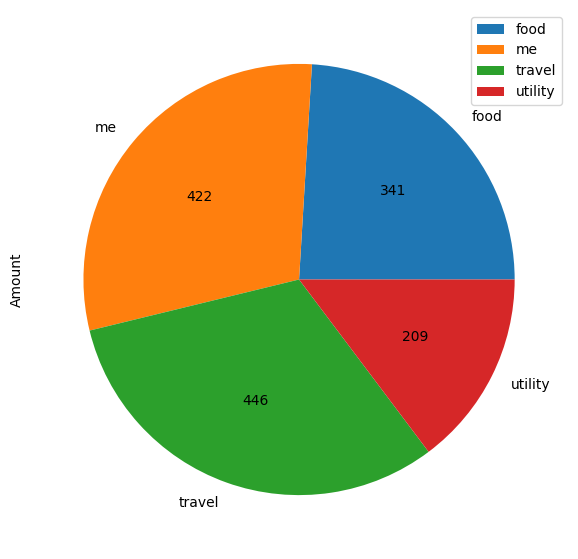

In [5]:
def absolute_value(val):
    return int(round(val / 100.0 * d["Amount"].sum()))


plt.figure(figsize=(7, 7))
d["Amount"].plot(kind="pie", autopct=absolute_value, legend=True)
plt.show()

## date wise

In [6]:
d = df[["Date", "Amount"]].groupby("Date").sum()
d

,Amount
Date,
2025-06-14,1011
2025-06-15,163
2025-06-16,285
2025-06-17,215
2025-06-18,343
2025-06-19,193
2025-06-20,172
2025-06-21,20


## plot


<Figure size 900x900 with 0 Axes>

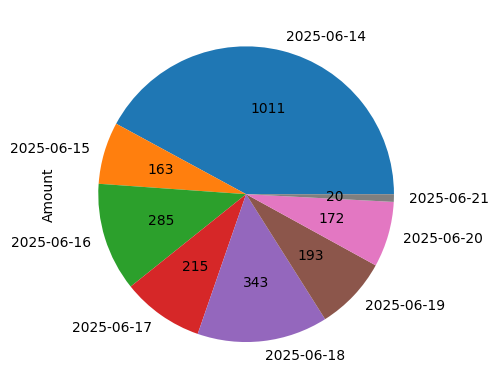

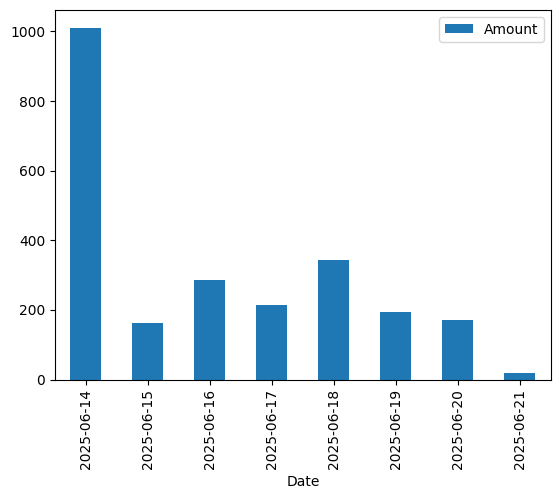

In [7]:
plt.figure(figsize=(9, 9))
try:
    d.plot(kind="pie", y="Amount", autopct=absolute_value, legend=False)
    d.plot(kind="bar")
except:
    pass

## owed

In [8]:
d = df[["Amount", "Split", "Not Me"]]
s = d[d["Not Me"] == 1]
d = d.drop(s.index)
sum1 = s["Amount"].sum()
sum2 = (d["Amount"] - (d["Amount"] / d["Split"])).sum()
print(sum1 + sum2)

984.0


## No of refills ago

In [9]:
def no_of_refills_ago(n):
    df = pd.read_csv("expenses.csv")
    refill_index = df[df["Date"] == "Refill"].index[-(n)]
    try:
        refill_index2 = df[df["Date"] == "Refill"].index[-(n + 1)]
    except:
        refill_index2 = 0
    df = df.loc[refill_index2 + 1 : refill_index - 1]
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(float)
    df["Not Me"] = df["Not Me"].astype(int)
    return categorical(df)


e = no_of_refills_ago(1)
e

,Amount
Category,
food,745.000000
me,321.000000
travel,1193.333333
utility,1183.000000


## common items

In [10]:
import pandas as pd


def most_common_item():
    df = pd.read_csv("expenses.csv")
    a = df["Item"].value_counts()
    print(a)


most_common_item()

Item
milk              75
petrol            41
chocolate         33
vegetables        28
food              22
                  ..
chaap              1
chocolate-milk     1
auto-to-mall       1
burger             1
auto-from-mall     1
Name: count, Length: 216, dtype: int64


# All time - starting sep 2022

In [11]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
y = df[df["Not Me"] == 0]
x = y["Amount"] / y["Split"]
86000 + x.sum()

np.float64(202278.5)

# Month Wise

In [12]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
df = df.drop(df[df["Not Me"] == 1].index)
df["Amount"] = df["Amount"] / df["Split"]
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
s = df.groupby(df["Date"].dt.month)
s = s["Amount"].sum()
s

Date
2     23840.000000
3     10078.000000
4     11198.500000
5     16796.000000
6     11479.833333
7      7773.000000
8      9305.166667
9      8535.500000
11    17272.500000
Name: Amount, dtype: float64